In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing


from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

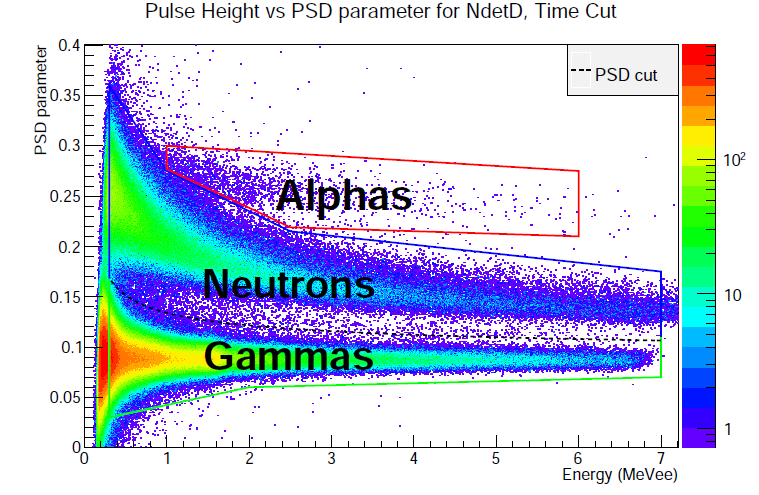

In [2]:
Image("image/psd_vsE_ambe.png")

In [3]:
df = pd.read_csv('AmBeU_from1MeVonwards.dat',  delimiter=' ', header=None)

In [4]:
pd.set_option('max_columns', 160)
df.head(2)
print(df.shape)

(120, 154)


In [5]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153
0,2,1,2.625,-6.40177,4.57145,-6.45532,-0.482091,5.49114,4.46436,-6.56241,4.410820,5.38405,0.357273,-6.6695,-0.696272,5.27696,4.25018,-6.77659,6.19664,85.1699,548.143,1837.12,3533.09,4269.06,4213.04,3401.01,2563.98,1720.96,1195.930,904.902,779.875,500.849,334.822,228.795,225.768,228.742,219.715,200.688,199.661,184.634,129.608,44.5809,-2.44591,4.52732,71.5005,120.474,107.447,36.4202,-2.60654,12.36670,76.3399,100.3130,64.2864,4.25959,-10.7672,-7.79395,33.1793,40.1525,27.1257,4.09896,3.072190,8.04541,13.0186,19.9919,16.9651,11.9383,12.9115,7.88478,-5.14200,-12.1688,6.80446,11.7777,19.7509,7.72414,-5.30263,-8.3294,16.6438,19.61710,18.5903,3.56351,-16.46330,-4.49004,18.48320,23.45640,18.42960,3.402870,2.37610,-8.65068,4.322550,3.295780,2.26901,3.24223,-5.78454,7.18869,2.16192,7.13514,6.10837,3.081600,14.0548,7.02805,-3.99872,-13.0255,-2.05227,6.920960,3.89419,2.86742,-3.15936,-9.18613,1.78710,2.760330,9.73355,2.70678,2.68001,2.65323,12.62650,14.59970,3.57292,-9.45386,3.51937,2.492600,2.46583,6.43905,2.41228,-9.614490,3.35874,-9.668040,3.30519,2.278420,-3.74836,2.22487,1.19810,6.171330,1.14455,2.117780,11.09100,2.06424,7.03746,6.010690,-4.01608,1.95715,4.93037,5.90360,8.876830,1.850050,2.82328,5.796510,2.769740,1.74296,0.716191,-10.310600,-7.33735,1.63587,0,5.582330
1,2,1,-3.625,6.35353,1.33205,2.31058,1.289110,-9.73236,-3.75384,2.22469,-0.796784,2.18174,-4.839730,-9.8612,-4.882680,6.09585,-2.92562,-9.94709,5.03143,34.0100,256.988,1045.97,2386.95,3253.92,3354.90,2737.88,2034.86,1385.84,948.817,709.795,616.774,469.752,318.731,193.709,170.688,169.666,176.645,149.623,138.602,129.581,112.559,69.5376,8.51608,1.49461,64.4731,101.452,102.430,41.4087,-11.61280,5.36577,50.3443,73.3228,58.3014,1.27988,-15.7416,-14.76310,16.2155,37.1940,36.1725,9.15104,0.129569,1.10810,10.0866,13.0652,10.0437,9.0222,18.0007,16.97930,-6.04221,-11.0637,7.91484,32.8934,21.8719,8.85042,1.82895,-11.1925,3.7860,4.76453,20.7431,16.72160,3.70011,-11.32140,3.65716,8.63569,9.61422,0.592745,-6.42873,-11.45020,-0.471674,0.506853,1.48538,8.46391,9.44243,4.42096,7.39949,-11.62200,1.35654,0.335069,7.3136,4.29212,1.27065,-11.7508,-2.77230,0.206232,11.18480,4.16329,1.14181,0.12034,-4.90113,0.077394,17.05590,8.03445,7.01298,3.99150,9.97003,3.94856,14.92710,7.90561,9.88414,-0.137336,4.84119,3.81972,6.79825,-0.223227,0.75530,-0.266173,10.71240,-0.309119,6.66941,3.64793,2.62646,-0.395011,-4.41648,-0.437957,-1.45943,11.51910,8.49762,-0.523849,6.45468,7.43321,6.41173,3.39026,-0.631213,-0.652686,-1.67416,-0.695632,0.282895,3.26142,9.239950,-0.781524,4.19700,-12.82450,0,-0.867416


In [6]:
#remember in the data, for a given row  0 is energy value, 1 is label and rest is sample from WF
array = df.values
#X_raw = array[:,2:154] full waveform (152 sample)
X_raw = array[:,2:82] #truncated waveform (80 sample)
Y = array[:,1] 
validation_size = 0.20
seed = 7

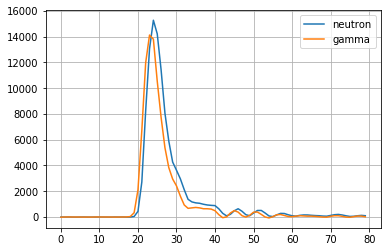

In [7]:
#plot some waveforms
plt.plot(X_raw[119],label='neutron') # a neutron, high energy range (66 to 120 neutrons)
plt.plot(X_raw[59],label='gamma') # a gamma, high energy (0 to 65 neutrons)
plt.legend()
plt.grid()
plt.show()

In [8]:
#row_sums = Xraw.sum(axis=1)

In [9]:
#need to divide  agiven row by the total sum of that row
tmp_df = pd.DataFrame(X_raw)
#https://stackoverflow.com/questions/35678874/normalize-rows-of-pandas-data-frame-by-their-sums
tmp_df=tmp_df.div(tmp_df.sum(axis=1), axis=0)

In [10]:
tmp_array=tmp_df.values
X = tmp_array[:,0:80] #truncated waveform (80 sample)

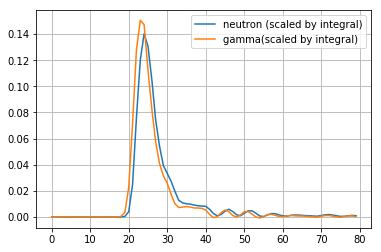

In [11]:
plt.plot(X[119],label='neutron (scaled by integral)') # a neutron
plt.plot(X[59],label='gamma(scaled by integral)') # a gamma
plt.legend()
plt.grid()
plt.show()

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed, shuffle=True)

##  Try    LR, LDA, KNN, NB, SVM

In [13]:
#y_test

In [14]:
scoring = 'accuracy'

# We are using the metric of ‘accuracy‘ to evaluate models. 
#This is a ratio of the number of correctly predicted instances in divided by the total number of instances
#in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate).
#We will be using the scoring variable when we run build and evaluate each model next.

#Build Models
# We don’t know which algorithms would be good on this problem or what configurations to use.

# Let’s evaluate 5 different algorithms with default parameters:

# Logistic Regression (LR)
# Linear Discriminant Analysis (LDA)
# K-Nearest Neighbors (KNN).
# Gaussian Naive Bayes (NB).
# Support Vector Machines (SVM).

# This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, NB and SVM) algorithms.


# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



LR: 0.563333 (0.126886)
LDA: 0.855556 (0.181353)
KNN: 0.895556 (0.080615)
NB: 0.990000 (0.030000)
SVM: 0.563333 (0.126886)


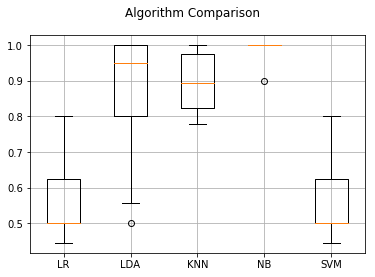

In [15]:
# We can also create a plot of the model evaluation results and compare the spread
#and the mean accuracy of each model. There is a population of accuracy measures for each algorithm
#because each algorithm was evaluated 10 times (10 fold cross validation).

# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

### Specifically look at the  KNN, get the accuracy, confusion matrix and classification report

In [16]:
KNN = KNeighborsClassifier() #default neighbors 5
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
[[13  0]
 [ 0 11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



### Tune KNN classifier

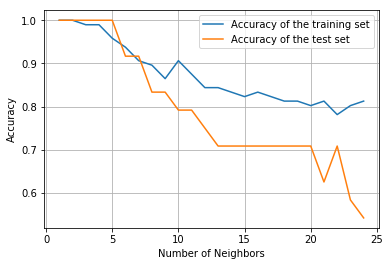

In [17]:
#----------KNN Classifier 
training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,25)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid()
plt.legend()
#by looking at plot, best result accurs when n_neighbors less than 5

In [18]:
print("Accuracy of the training set for 2NN: {:3f}".format(training_accuracy[2]))
print("Accuracy of the test set for 2NN: {:3f}".format(test_accuracy[2]))

Accuracy of the training set for 2NN: 0.989583
Accuracy of the test set for 2NN: 1.000000


## DT, Random forest, multilayer perceptron

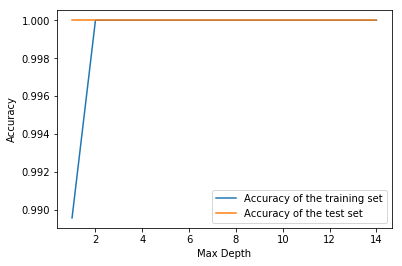

In [19]:
training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=42)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

### Tune RF

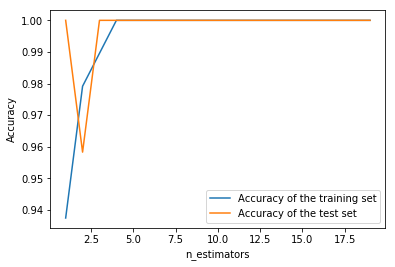

In [20]:
#RF
#forest = RandomForestClassifier(n_estimators=5, random_state=42)
#forest.fit(X_train,y_train)

#you can tune parameter such as:
# - n_job (how many cores)(n_job=-1 => all cores)
# - max_depth
# - max_feature

training_accuracy = []
test_accuracy = []

estimator_setting = range(1,20)

for n_estimator in estimator_setting:
    forest = RandomForestClassifier(n_estimators=n_estimator,random_state=42)
    forest.fit(X_train,y_train)
    training_accuracy.append(forest.score(X_train, y_train))
    test_accuracy.append(forest.score(X_test, y_test))
 
plt.plot(estimator_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(estimator_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.legend()



### MLP

In [21]:
#naive MLP
mlp = MLPClassifier(random_state=42)# hidden_layer_sizes, default 100
mlp.fit(X_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))

acc for training data: 0.781
acc for test data: 0.792


In [22]:
#scale columns for MLP
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

acc for training data: 1.000
acc for test data: 1.000


### Support vector machines

In [23]:


from sklearn.svm import SVC 
svm= SVC()
svm.fit(X_train, y_train)

print('acc on train dataset: {:.3f}'.format(svm.score(X_train,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test,y_test)))


acc on train dataset: 0.562
acc on test dataset: 0.458


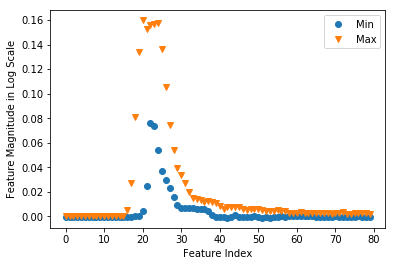

In [24]:
# min and max and between diffent samples on a given column (ie differences in features)

plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
#plt.yscale('log') # if we want to see zoomed in values
plt.legend(loc='upper right')

In [25]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train
X_test_scaled = (X_test - min_train)/range_train

print('Min per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Max per feature\n{}'.format(X_train_scaled.max(axis=0)))

Min per feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Max per feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [26]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
print('acc on train dataset: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

acc on train dataset: 1.000
acc on test dataset: 1.000
